In [1]:
# Importación de las librerías que necesitamos
from   sklearn.datasets   import make_gaussian_quantiles
import matplotlib.pyplot  as plt
import numpy              as np

Shape de las entradas     de la red: (1000, 2)
Shape de las predicciones de la red: (1000, 1)


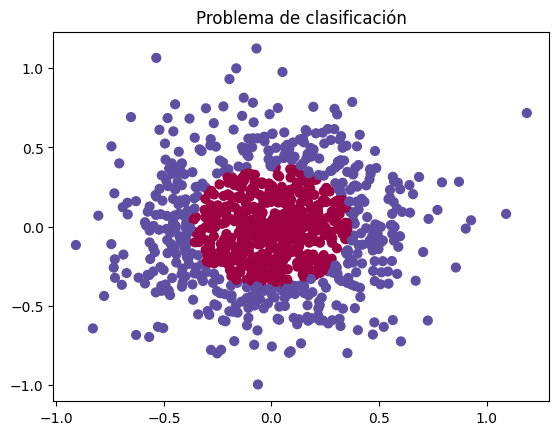

In [2]:
# Creación del dataset
gaussian_quantiles = make_gaussian_quantiles(mean=None,
                                             cov=0.1,
                                             n_samples=1000,
                                             n_features=2,
                                             n_classes=2,
                                             shuffle=True,
                                             random_state=None)

X, Y = gaussian_quantiles

# Necesario para hacer el plot más cómodo
Y = Y[:,np.newaxis]

# Shapes de X e Y de 2 clases
print('Shape de las entradas     de la red:', X.shape)
print('Shape de las predicciones de la red:', Y.shape)

# Gráfico de dispersión (scatter plot), de la distribución de los datos
plt.title("Problema de clasificación")
plt.scatter(X[:,0], X[:,1], c=Y[:,0], s=40, cmap=plt.cm.Spectral)

In [3]:
# Funciones de activación (Sigmoide y ReLU)

def sigmoid(x, derivate = False):
    if derivate:
        return np.exp(-x)/(( np.exp(-x) +1)**2)
    else:
        return 1 / (1 + np.exp(-x))

def relu(x, derivate = False):
    if derivate:
        x[x<=0] = 0
        x[x>0] = 1
        return x
    else:
        return np.maximum(0,x)

In [4]:
# Función de pérdida (MSE)
def mse(y,y_hat,derivate=False):
    if derivate:
        return (y_hat - y)
    else:
        return np.mean((y_hat - y)**2)


In [12]:
# Función de inicialización de pesos
def initialize_parameters_deep(layer_dims: list) -> dict:
    """
    Genera un diccionario de pesos y sesgos para una RNA, de acuerdo a su arquitectura de capas
      :param layer_dims: lista que representa la cantidad de neuronas presente en cada capa de la red
      :return: dict: parameters.
    """
    parameters = {}
    L = len(layer_dims)

    for l in range(0, L - 1):
        """
        Multiplicar por 2 y restar 1 es una forma de normalizar los datos para que vayan
        de -1 a 1, de esta forma encajan mejor con la distribución de datos de entrada
        de nuestro problema, pero no es indispensable
        """
        parameters[f'W{l + 1}'] = (np.random.rand(layer_dims[l], layer_dims[l + 1]) * 2) - 1

        parameters[f'b{l + 1}'] = (np.random.rand(1, layer_dims[l + 1]) * 2) - 1

        print(f"Inicializando PESO W{l + 1} con dimensiones:", parameters[f'W{l + 1}'].shape)
        print(f"Inicializando BIAS b{l + 1} con dimensiones:", parameters[f'b{l + 1}'].shape)

    return parameters

In [7]:
# Forward propagation
def linear_forward(A, W, b):
    Z = np.dot(A, W) + b
    return Z

def linear_activation_forward(A_prev, W, b, activation_function):
    Z = linear_forward(A_prev, W, b)
    A = activation_function(Z)
    return A

def forward_step(A0, params, activations_functions, n_layers):
    L = n_layers
    params["A0"] = A0
    for i in range(1, L + 1):
        params[f"A{i}"] = linear_activation_forward(params[f"A{i - 1}"], params[f"W{i}"], params[f"b{i}"],
                                                    activations_functions[i])
    y_hat = params[f"A{L}"]
    return y_hat

In [8]:
# Backpropagation
def backpropagation(Y, y_hat, params, activations_functions, error_function, n_layers):
    L = n_layers
    params[f'dZ{L}'] = error_function(Y, y_hat, True) * activations_functions[L](params[f'A{L}'], True)
    params[f'dW{L}'] = np.dot(params[f'A{L - 1}'].T, params[f'dZ{L}'])

    for l in reversed(range(2, L + 1)):
        params[f'dZ{l - 1}'] = np.matmul(params[f'dZ{l}'], params[f'W{l}'].T) * activations_functions[l - 1](
            params[f'A{l - 1}'], True)

    for l in reversed(range(1, L)):
        params[f'dW{l}'] = np.matmul(params[f'A{l - 1}'].T, params[f'dZ{l}'])

    return params

In [9]:
# Gradient descent
def gradient_descent(params, lr, n_layers):
    L = n_layers

    for l in reversed(range(1, L + 1)):
        params[f'W{l}'] = params[f'W{l}'] - params[f'dW{l}'] * lr
        params[f'b{l}'] = params[f'b{l}'] - (np.mean(params[f'dZ{l}'], axis=0, keepdims=True)) * lr

    return params

In [10]:
# Train model function
def train_model(X, Y, layer_dims, params, activations_functions, error_function, lr, epochs):
    errors = []
    n_layers = len(layer_dims) - 1
    j = 1
    for _ in range(epochs):
        y_hat = forward_step(X, params, activations_functions, n_layers)
        params = backpropagation(Y, y_hat, params, activations_functions, error_function, n_layers)
        params = gradient_descent(params, lr, n_layers)

        if _ % 100 == 0:
            e = error_function(Y, y_hat)
            if _ % 1000 == 0:
                print(j, "error:", e)
                j += 1
            errors.append(e)

    return errors, params

In [13]:
# Definir arquitectura de la RNA
layer_dims = [2, 4, 8, 1]
lr = 0.002
activations_functions = [0, relu, relu, sigmoid]
params = initialize_parameters_deep(layer_dims)
epochs = 10000

Inicializando PESO W1 con dimensiones: (2, 4)
Inicializando BIAS b1 con dimensiones: (1, 4)
Inicializando PESO W2 con dimensiones: (4, 8)
Inicializando BIAS b2 con dimensiones: (1, 8)
Inicializando PESO W3 con dimensiones: (8, 1)
Inicializando BIAS b3 con dimensiones: (1, 1)


1 error: 0.26054283417686447
2 error: 0.19861368548000097
3 error: 0.1666437071004471
4 error: 0.15569880028738037
5 error: 0.15869903611655775
6 error: 0.1601175075115958
7 error: 0.1499255956418734
8 error: 0.14916264230761295
9 error: 0.15679814553236507
10 error: 0.14804915008356084


Text(0, 0.5, 'MSE')

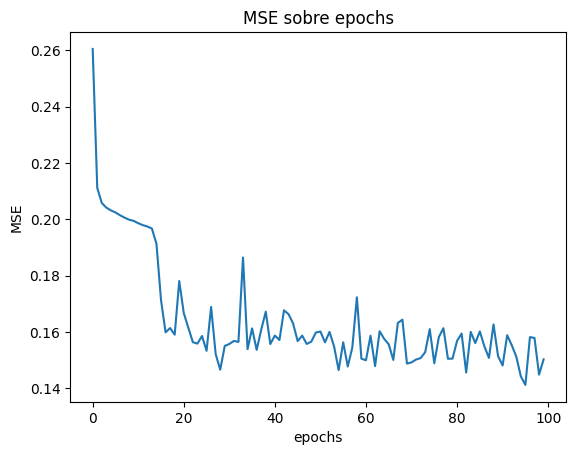

In [14]:
# Función de entrenamiento
errors, params = train_model(X, Y, layer_dims, params, activations_functions, mse, lr, epochs)
plt.plot(errors)
plt.title("MSE sobre epochs")
plt.xlabel("epochs")
plt.ylabel("MSE")

Text(0.5, 1.0, 'Predicción NN')

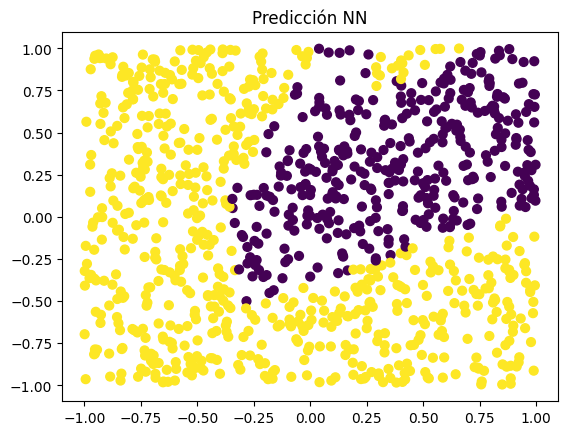

In [15]:
# Probando el modelo con datos nuevos
data_test = (np.random.rand(1000, 2) * 2) - 1
prediction = forward_step(data_test, params, activations_functions, 3)
y = np.where(prediction >= 0.5, 1, 0)
plt.scatter(data_test[:, 0], data_test[:, 1], c=y[:, 0], s=40)
plt.title("Predicción NN")